In [1]:
%matplotlib inline

from matplotlib import rc

import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = 'serif'

In [3]:
def setBwStyles(ax):
    from cycler import cycler

    ax.set_prop_cycle( #cycler('marker', ['.', 'x', 4, '+', '*', '1']) +
                       #cycler('linestyle', ['-.', '--', ':', '-.', '--', ':']) +
                       #cycler('markersize', [15, 15, 15, 15, 15, 15]) +
                       cycler('color', ['k', 'k', 'k', 'k', 'k', 'k']) )

/home/andreb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


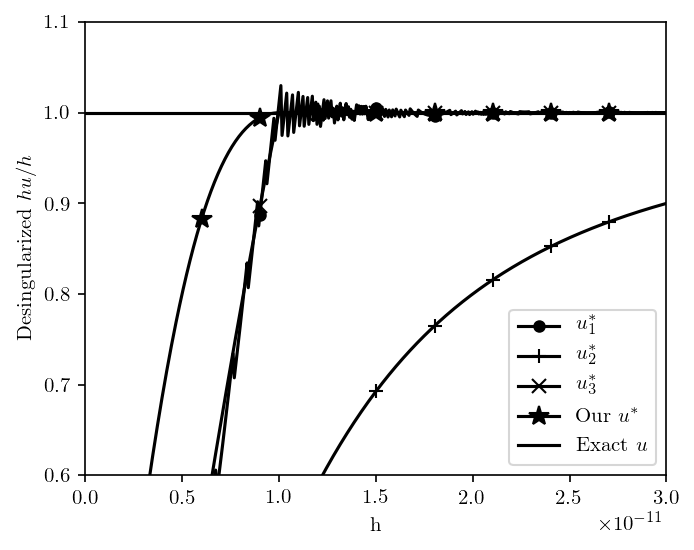

/home/andreb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/andreb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/home/andreb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


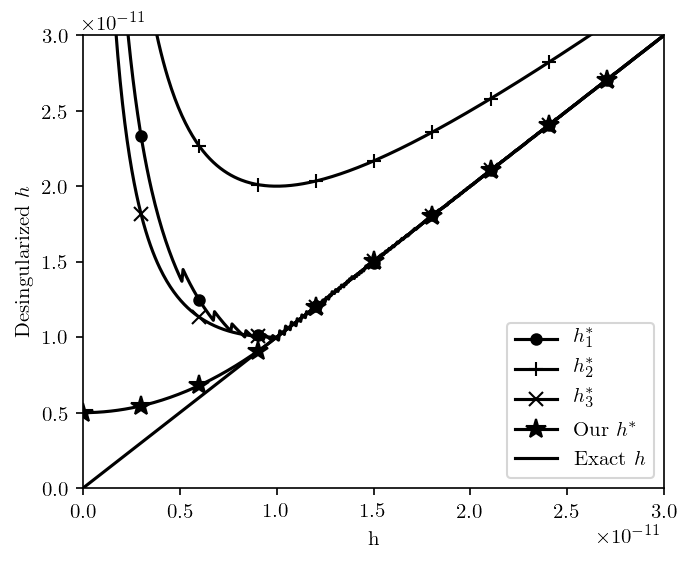

In [4]:
def desingularise_our(hu, h, eps):
    return hu / np.maximum(np.minimum(h*h/(2.0*eps)+0.5*eps, eps), np.abs(h))

def desingularise_kp1(hu, h, eps):
    return np.sqrt(2.0)*h*hu/np.sqrt(h**4+np.maximum(h**4, eps**4))

def desingularise_kp2(hu, h, eps):
    return h*hu/(h**2+eps**2)

def desingularise_kp3(hu, h, eps):
    return 2*h*hu/(h**2+np.maximum(h**2, eps**2))




def desingularised_h_our(hu, h, eps):
    return np.maximum(np.minimum(h*h/(2.0*eps)+0.5*eps, eps), np.abs(h))

def desingularised_h_kp1(hu, h, eps):
    return np.sqrt(h**4+np.maximum(h**4, eps**4)) / (np.sqrt(2.0)*h)

def desingularised_h_kp2(hu, h, eps):
    return (h**2+eps**2) / h

def desingularised_h_kp3(hu, h, eps):
    return (h**2+np.maximum(h**2, eps**2)) / (2*h)




x = np.linspace(0, 3.0e-11, 500).astype(np.float32)
h = x.copy()
u = np.ones_like(h)*1.0
hu = h*u
u_true = hu/h
u_our = desingularise_our(hu, h, 1.0e-11)
u_kp1 = desingularise_kp1(hu, h, 1.0e-11)
u_kp2 = desingularise_kp2(hu, h, 1.0e-11)
u_kp3 = desingularise_kp3(hu, h, 1.0e-11)


fig = plt.figure(figsize=(5, 4), dpi=150)
#setBwStyles(fig.gca())
plt.plot(x, u_kp1, label='$u^*_1$', markevery=50, marker='.', color='k', markersize=10)
plt.plot(x, u_kp2, label='$u^*_2$', markevery=50, marker='+', color='k', markersize=7)
plt.plot(x, u_kp3, label='$u^*_3$', markevery=50, marker='x', color='k', markersize=7)
plt.plot(x, u_our, label='Our $u^*$', markevery=50, marker='*', color='k', markersize=10)
plt.plot(x, u_true, label='Exact $u$', markevery=50, color='k', markersize=5)
plt.ylim([0.6, 1.1])
plt.xlim([0, 3.0e-11])
plt.xlabel('h')
plt.ylabel('Desingularized $hu/h$')
plt.legend()
plt.savefig("desing_hu.pdf", bbox_inches = "tight")
plt.show()


h = x.copy()
u = np.ones_like(h)*1.01
hu = h*u
h_true = h
h_our = desingularised_h_our(hu, h, 1.0e-11)
h_kp1 = desingularised_h_kp1(hu, h, 1.0e-11)
h_kp2 = desingularised_h_kp2(hu, h, 1.0e-11)
h_kp3 = desingularised_h_kp3(hu, h, 1.0e-11)

fig = plt.figure(figsize=(5, 4), dpi=150)
#setBwStyles(fig.gca())
plt.plot(x, h_kp1, label='$h^*_1$', markevery=50, marker='.', color='k', markersize=10)
plt.plot(x, h_kp2, label='$h^*_2$', markevery=50, marker='+', color='k', markersize=7)
plt.plot(x, h_kp3, label='$h^*_3$', markevery=50, marker='x', color='k', markersize=7)
plt.plot(x, h_our, label='Our $h^*$', markevery=50, marker='*', color='k', markersize=10)
plt.plot(x, h_true, label='Exact $h$', markevery=50, color='k', markersize=5)
plt.ylim([0, 3.0e-11])
plt.xlim([0, 3.0e-11])
plt.xlabel('h')
plt.ylabel('Desingularized $h$')
plt.legend()
plt.savefig("desing_h.pdf", bbox_inches = "tight")
plt.show()